In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv("C:/Users/manan/OneDrive/Documents/cureya data set/insurance.csv")
print(df.head())


   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [13]:
print(df.shape)
print(df.isna().sum())
print(df.describe())


(1338, 7)
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [58]:
# male : 0, female : 1
df['sex'] = df['sex'].map({'male':0, 'female':1})

# yes : 0, no : 1
df['smoker'] = df['smoker'].map({'yes':0, 'no':1})
df.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,0,16884.92400
1,18,0,33.770,1,1,1725.55230
2,28,0,33.000,3,1,4449.46200
3,33,0,22.705,0,1,21984.47061
4,32,0,28.880,0,1,3866.85520


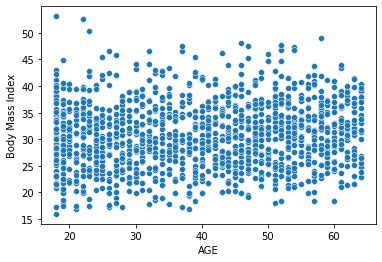

In [10]:
#AGE VS BMI

sns.scatterplot(x='age',y='bmi',data =df)
plt.xlabel('AGE')
plt.ylabel('Body Mass Index')
plt.show()

C:\Users\manan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


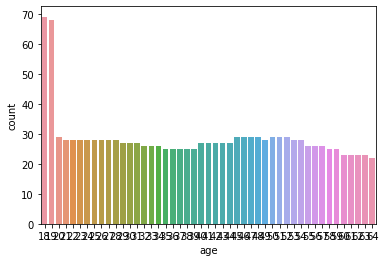

In [46]:
# Age distribution of smokers
df_smoker = df[df['smoker']=='yes']
#print(df_smoker.head())
sns.countplot(df['age'])

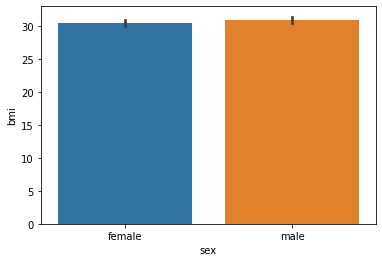

In [18]:
#BMI VS Gender
sns.barplot(x='sex', y= 'bmi', data = df )
plt.show()

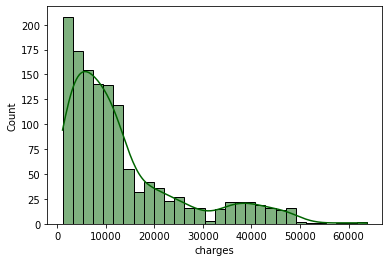

In [19]:
#Histogram of charges
sns.histplot(x = df['charges'], kde=True);
plt.show()

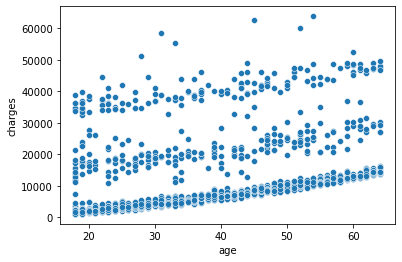

In [20]:
sns.scatterplot(x='age',y='charges',data =df)
plt.show()


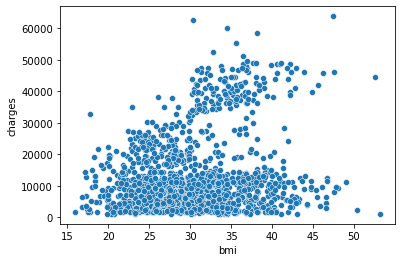

In [43]:
sns.scatterplot(x='bmi', y ='charges',data =df)
plt.show()


In [59]:
# Machine learning
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import StandardScaler

print(df.head())
#x = df.drop("region",axis =1,  inplace=True)
X = df.drop('charges',axis =1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



   age  sex     bmi  children  smoker      charges
0   19    1  27.900         0       0  16884.92400
1   18    0  33.770         1       1   1725.55230
2   28    0  33.000         3       1   4449.46200
3   33    0  22.705         0       1  21984.47061
4   32    0  28.880         0       1   3866.85520


In [60]:
# importing different models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

lr = LinearRegression()
lr.fit(X_train, y_train)
LinearRegressionScore = lr.score(X_test, y_test)
print("Accuracy obtained by Linear Regression model:",LinearRegressionScore*100)

rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train,y_train)
RandomForestRegressorScore = rf.score(X_test, y_test)
print("Accuracy obtained by Random Forest Regressor model:",RandomForestRegressorScore*100)

tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)
DecisionTreeRegressorScore = tree.score(X_test, y_test)
print("Accuracy obtained by Decision Tree Regressor model:",DecisionTreeRegressorScore*100)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
KNeighborsRegressor()
KNeighborsRegressorScore = knn.score(X_test, y_test)
print("Accuracy obtained by K Neighbors Regressor model:",KNeighborsRegressorScore*100)





Accuracy obtained by Linear Regression model: 76.8088164360072
Accuracy obtained by Random Forest Regressor model: 84.80515264993281
Accuracy obtained by Decision Tree Regressor model: 75.74988612790831
Accuracy obtained by K Neighbors Regressor model: 83.43276278583814
